In [1]:
import pandas as pd

titanic = pd.read_csv("./data/train.csv")

In [2]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jarvis, Mr. John Denzil",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## PassengerId semble être une clé unique

In [5]:
titanic.PassengerId.describe(include='all')

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [6]:
titanic["PassengerId"].value_counts().head()

891    1
293    1
304    1
303    1
302    1
Name: PassengerId, dtype: int64

# Prédiction avec une regression logistique

## Découpage du jeu de données
**SisbSp** (Sibling and Spouse) : le nombre de membres de la famille du passager de même génération  
**Parch** (Parent and Child) : le nombre de membres de la famille du passager de génération différente  
**Fare** : le prix du ticket  
**Survived** : survivant (1) ou pas (0)

In [7]:
def Prepare_Modele_1(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [8]:
X, y = Prepare_Modele_1(titanic.copy())

## Estimation via 5 Validation croisée

In [9]:
from sklearn.model_selection import cross_val_score
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return xval.mean() *100

### Test avec une regression logistique
Cette fonction prend en paramètre un classifieur, la matrice X et la cible Y. Elle fait appel
au module cross_val_score qui réalise 5 validations croisées, c’est-à-dire qu’on entraîne
sur 4/5 du jeu de données et qu’on teste sur le 1/5 restant.

In [10]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
compute_score(lr1, X, y) 

67.45488577683349

## Regression logistique simple

In [11]:
lr2 = LogisticRegression()
lr2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prédiction pour un billet pas cher

In [12]:
lr2.predict([[5.1,1,0]])

array([0])

### Prédiction pour un billet cher

In [13]:
lr2.predict([[100.1,1,0]])

array([1])

### Scoring de notre prédiction

In [14]:
lr2.score(X, y)

0.6812570145903479

### Distribution par classe des survivants/morts

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plt_feature(feature, bins = 30):
    m = titanic[titanic.Survived == 0][feature].dropna()
    s = titanic[titanic.Survived == 1][feature].dropna()
    plt.hist([m, s], label=['Morts', 'Survivants'], bins = bins)
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


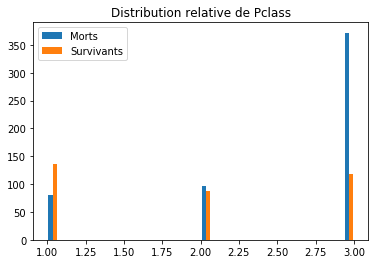

In [59]:
plt_feature('Pclass')

### Distribution par sexe des survivants/morts

Text(0.5,1,'Survivants par sexe')

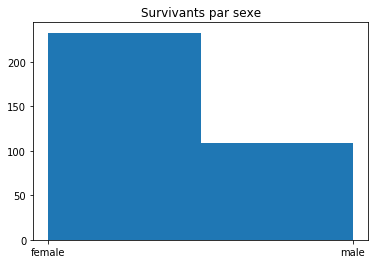

In [80]:
morts = titanic[titanic.Survived == 0]['Sex'].dropna()
vivants = titanic[titanic.Survived == 1]['Sex'].dropna()

plt.hist(vivants, label=['Vivants'], bins = 2)
plt.title('Survivants par sexe')

Text(0.5,1,'Décès par sexe')

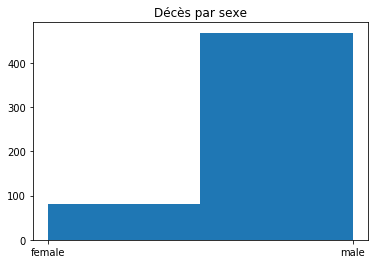

In [79]:
plt.hist(morts, label=['Morts'], bins = 2)
plt.title('Décès par sexe')